# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- State-Owned Swiss Bank Postfinance to Offer Clients Direct Access to Crypto Market.  Swiss post office&#x2019;s banking unit, the state-owned Postfinance, is reportedly preparing to enter the crypto market. &#x201C;Our clients want direct access to this market through their house bank.&#x201D; Swiss Post Office&#x2019;s Banking Arm to Enter Crypto Market The banking and financial services arm of Swiss Post, the state-owned enterprise responsible for Switzerland&#x2019;s postal and other [&#8230;] ... [| Skaityti daugiau](https://news.bitcoin.com/state-owned-swiss-bank-postfinance-to-offer-clients-direct-access-to-crypto-market/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- 10 unvaccinated Royals players to miss trip to Toronto for series against Blue Jays | CBC Sports.  The Kansas City Royals will be without 10 of the 26 players on their active roster for their upcoming trip to Toronto due to Canadian restrictions on travellers who aren't vaccinated against COVID-19. ... [| Skaityti daugiau](http://www.cbc.ca/sports/baseball/mlb/mlb-toronto-blue-jays-fire-kansas-city-royals-unvaccinated-players-1.6520000) 

### Kainų kaita pandemijos metu

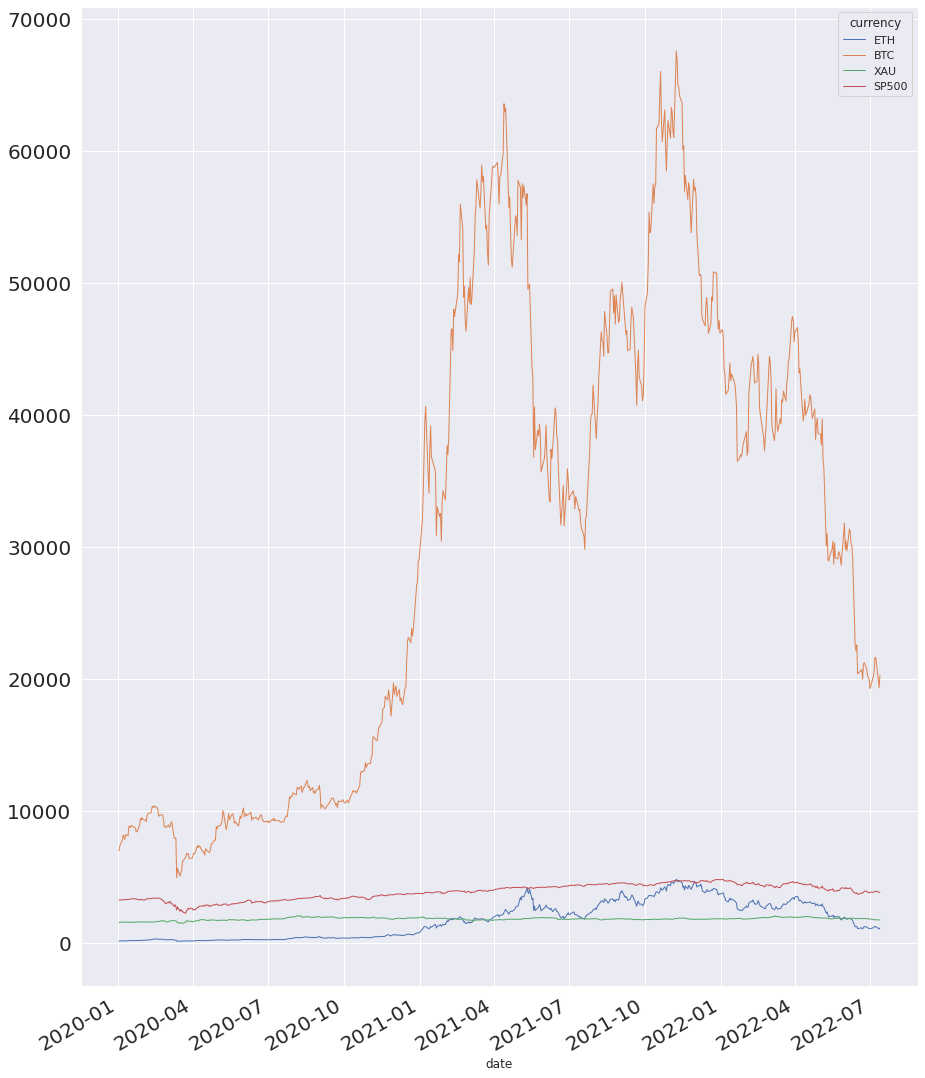

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903441,0.247668,0.920930
BTC,0.903441,1.000000,0.195751,0.867286
XAU,0.247668,0.195751,1.000000,0.377242
SP500,0.920930,0.867286,0.377242,1.000000


In [8]:
#hide ### Koreliacijos matrica.

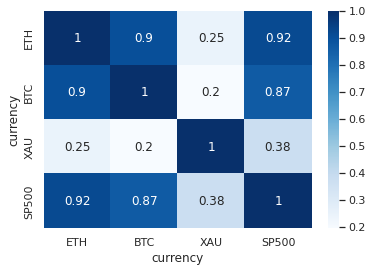

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')